<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj4/Datasaurus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datasaurus Dozen
Datasaurus Dozen to zestaw danych stworzony przez Justin Matejka i George'a Fitzmaurice, który ilustruje dlaczego wizualizacja danych jest tak ważna.

## Czym jest Datasaurus Dozen?
To 13 różnych zestawów danych, które mają niemal identyczne statystyki opisowe (średnią, odchylenie standardowe, korelację), ale gdy je zwizualizujemy, wyglądają kompletnie inaczej! Jeden z nich tworzy kształt dinozaura, inne tworzą gwiazdę, okrąg, linie itp.

## Dlaczego to ważne?
Pokazuje, że samo patrzenie na statystyki może być mylące. Zawsze trzeba wizualizować dane!

In [33]:
# Import bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Ustawienia wizualizacji
plt.rcParams['figure.figsize'] = (15, 10)
sns.set_style("whitegrid")


# CZĘŚĆ 1: Wczytywanie danych

In [34]:
print("Wczytywanie danych Datasaurus Dozen...")
datasaurus = pd.read_csv("datasaurus.csv", sep=',')
print(f"✓ Wczytano {len(datasaurus)} wierszy danych")
print(f"✓ Liczba różnych zestawów: {datasaurus['dataset'].nunique()}")
print("\nDostępne zestawy danych:")
print(datasaurus['dataset'].unique())

print("\nPierwsze wiersze danych:")
print(datasaurus.head(10))

Wczytywanie danych Datasaurus Dozen...
✓ Wczytano 1846 wierszy danych
✓ Liczba różnych zestawów: 13

Dostępne zestawy danych:
['dino' 'away' 'h_lines' 'v_lines' 'x_shape' 'star' 'high_lines' 'dots'
 'circle' 'bullseye' 'slant_up' 'slant_down' 'wide_lines']

Pierwsze wiersze danych:
  dataset        x        y
0    dino  55.3846  97.1795
1    dino  51.5385  96.0256
2    dino  46.1538  94.4872
3    dino  42.8205  91.4103
4    dino  40.7692  88.3333
5    dino  38.7179  84.8718
6    dino  35.6410  79.8718
7    dino  33.0769  77.5641
8    dino  28.9744  74.4872
9    dino  26.1538  71.4103


# CZĘŚĆ 2: Analiza statystyczna


In [35]:
# Obliczmy podstawowe statystyki dla każdego zestawu
stats_summary = datasaurus.groupby('dataset').agg({
    'x': ['mean', 'std'],
    'y': ['mean', 'std']
}).round(2)

# Obliczmy korelację dla każdego zestawu
correlations = datasaurus.groupby('dataset').apply(
    lambda group: np.corrcoef(group['x'], group['y'])[0, 1]
).round(2)

print("\nStatystyki dla każdego zestawu danych:")
print(stats_summary)
print("\nKorelacje między x i y:")
print(correlations)


Statystyki dla każdego zestawu danych:
                x             y       
             mean    std   mean    std
dataset                               
away        54.27  16.77  47.83  26.94
bullseye    54.27  16.77  47.83  26.94
circle      54.27  16.76  47.84  26.93
dino        54.26  16.77  47.83  26.94
dots        54.26  16.77  47.84  26.93
h_lines     54.26  16.77  47.83  26.94
high_lines  54.27  16.77  47.84  26.94
slant_down  54.27  16.77  47.84  26.94
slant_up    54.27  16.77  47.83  26.94
star        54.27  16.77  47.84  26.93
v_lines     54.27  16.77  47.84  26.94
wide_lines  54.27  16.77  47.83  26.94
x_shape     54.26  16.77  47.84  26.93

Korelacje między x i y:
dataset
away         -0.06
bullseye     -0.07
circle       -0.07
dino         -0.06
dots         -0.06
h_lines      -0.06
high_lines   -0.07
slant_down   -0.07
slant_up     -0.07
star         -0.06
v_lines      -0.07
wide_lines   -0.07
x_shape      -0.07
dtype: float64


/tmp/ipython-input-3836624271.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = datasaurus.groupby('dataset').apply(


# CZĘŚĆ 3: WIZUALIZACJA - Tutaj magia się dzieje!

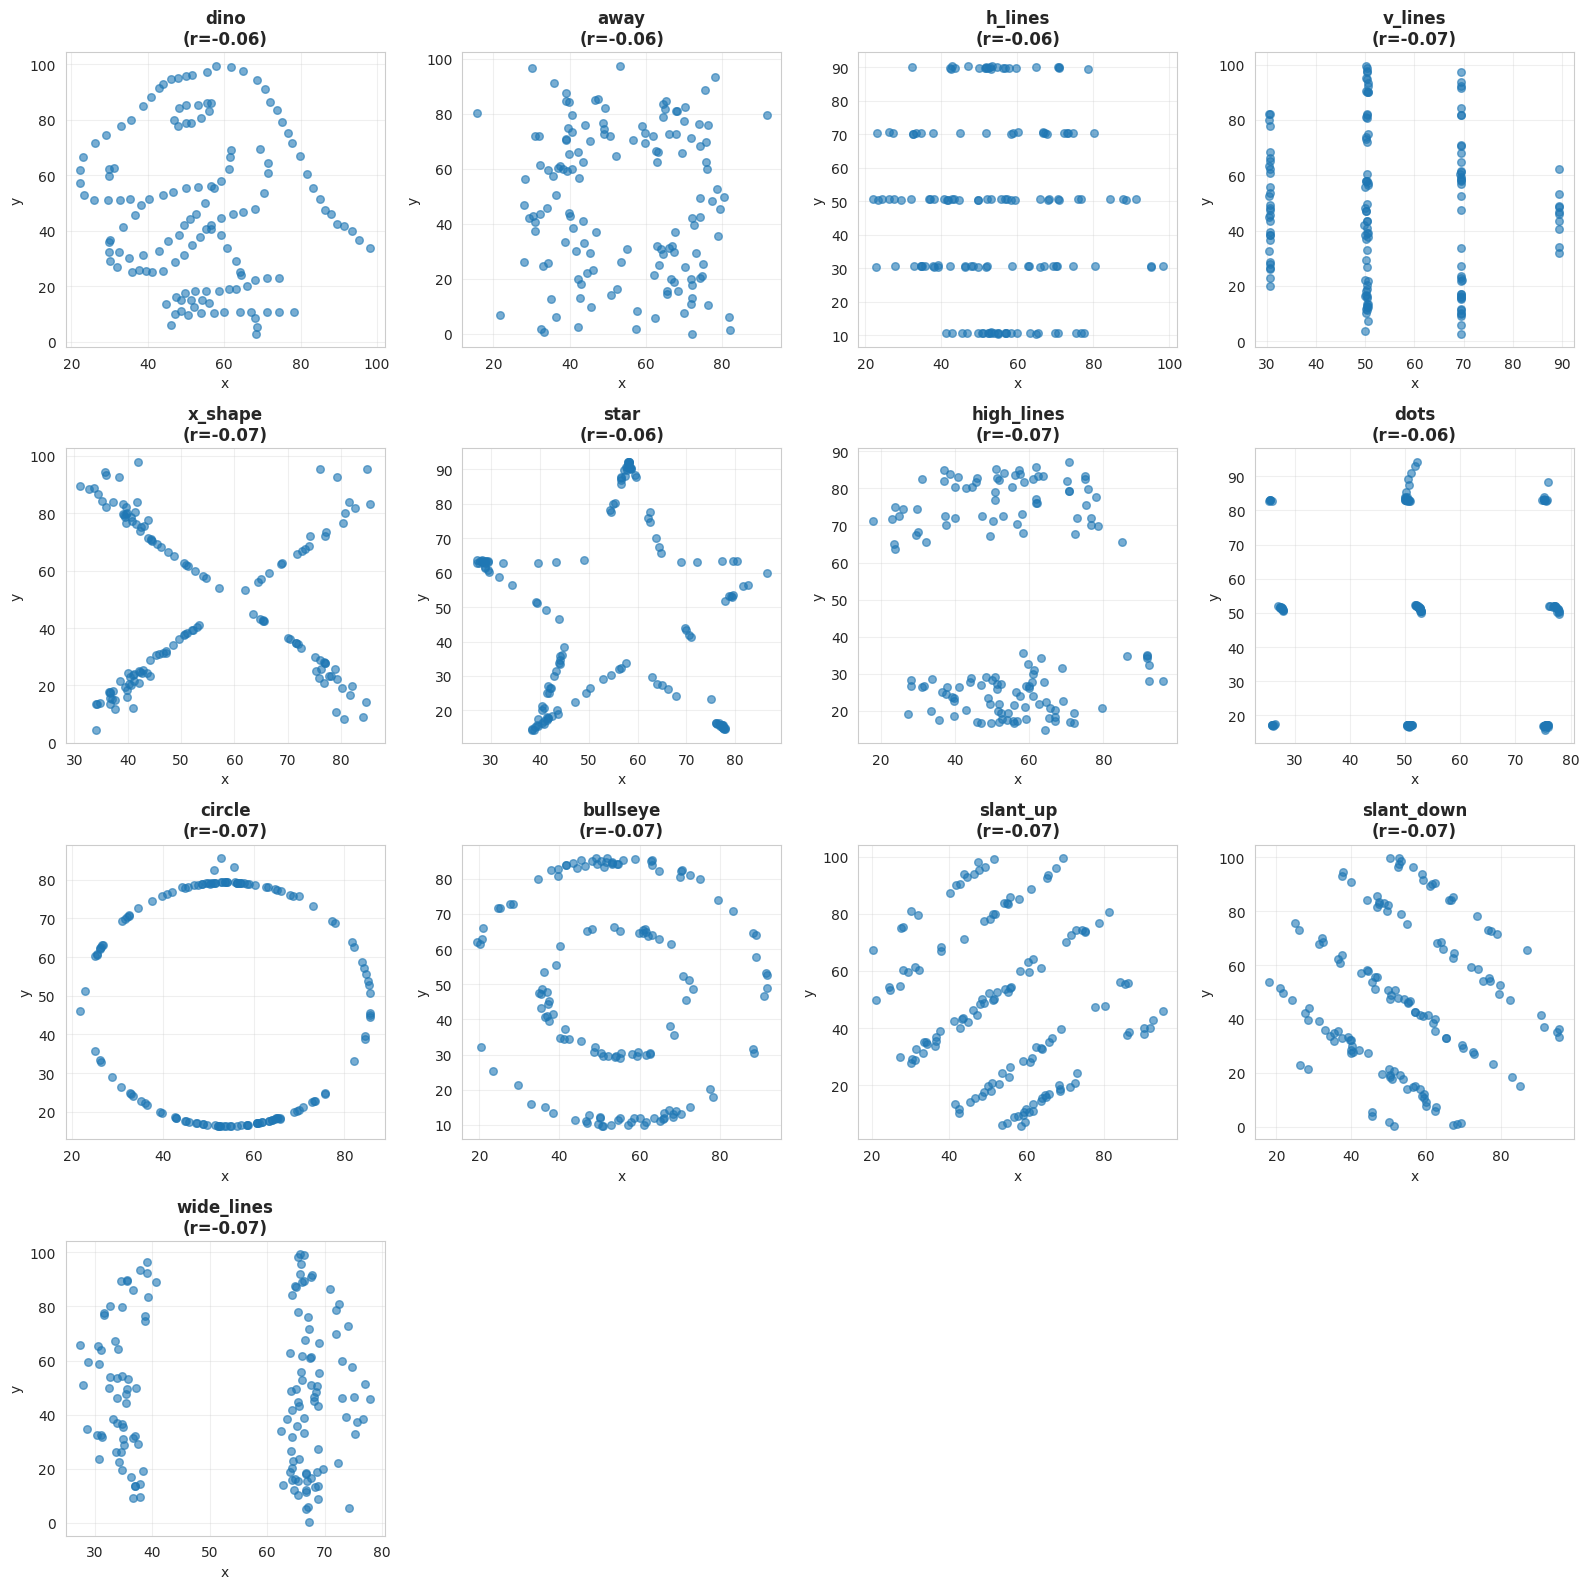

In [36]:
# Pobierzmy unikalne nazwy zestawów
datasets = datasaurus['dataset'].unique()
n_datasets = len(datasets)

# Obliczmy układ siatki
n_cols = 4
n_rows = (n_datasets + n_cols - 1) // n_cols # ??

# Stwórzmy wielką wizualizację
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten() if n_datasets > 1 else [axes]

for idx, dataset_name in enumerate(datasets):
    # Filtruj dane dla tego zestawu
    subset = datasaurus[datasaurus['dataset'] == dataset_name]

    # Rysuj scatter plot
    axes[idx].scatter(subset['x'], subset['y'], alpha=0.6, s=30)
    axes[idx].set_title(f'{dataset_name}\n(r={correlations[dataset_name]:.2f})',
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].grid(True, alpha=0.3)

# Ukryj puste subploty
for idx in range(n_datasets, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()

# CZĘŚĆ 4: Szczegółowa analiza jednego zestawu (dino)


Statystyki dla zestawu 'dino':
  Średnia x: 54.26
  Średnia y: 47.83
  Odchylenie std x: 16.77
  Odchylenie std y: 26.94
  Korelacja: -0.06


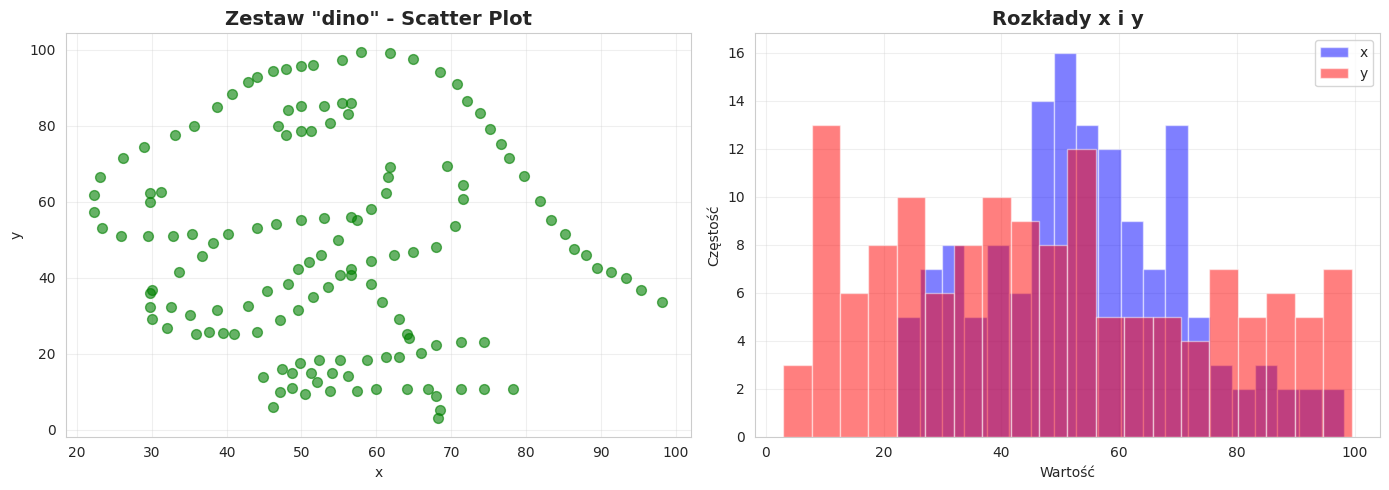

In [37]:
dino = datasaurus[datasaurus['dataset'] == 'dino']

print(f"\nStatystyki dla zestawu 'dino':")
print(f"  Średnia x: {dino['x'].mean():.2f}")
print(f"  Średnia y: {dino['y'].mean():.2f}")
print(f"  Odchylenie std x: {dino['x'].std():.2f}")
print(f"  Odchylenie std y: {dino['y'].std():.2f}")
print(f"  Korelacja: {np.corrcoef(dino['x'], dino['y'])[0,1]:.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Wykres rozrzutu
axes[0].scatter(dino['x'], dino['y'], alpha=0.6, s=50, color='green')
axes[0].set_title('Zestaw "dino" - Scatter Plot', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True, alpha=0.3)

# Histogramy
axes[1].hist(dino['x'], alpha=0.5, label='x', bins=20, color='blue')
axes[1].hist(dino['y'], alpha=0.5, label='y', bins=20, color='red')
axes[1].set_title('Rozkłady x i y', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Wartość')
axes[1].set_ylabel('Częstość')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Podsumowanie

1. STATYSTYKI MOGĄ BYĆ IDENTYCZNE
   
   Wszystkie zestawy mają podobne:
   - Średnie (około 54 dla x, około 47 dla y)
   - Odchylenia standardowe
   - Korelacje (około -0.06)

2. ALE DANE SĄ RÓŻNE!
   Wizualizacja pokazuje kompletnie różne kształty:
   - Dinozaur
   - Gwiazda
   - Okrąg
   - Linie
   - i wiele innych!

3. MORAŁ: **ZAWSZE WIZUALIZUJ SWOJE DANE!**
   
   Samo patrzenie na statystyki może być bardzo mylące.
   
   Dwa zbiory danych mogą mieć identyczne statystyki,
   ale reprezentować kompletnie różne zjawiska.

4. PRAKTYCZNE ZASTOSOWANIE:
   - Przed analizą statystyczną, zrób wykres
   - Sprawdź rozkład danych
   - Szukaj wartości odstających (outliers)
   - Zidentyfikuj wzorce, które statystyki mogą ukryć

**ZADANIE 1: Analiza porównawcza (łatwe)**
--------------------------------------
Wybierz dwa zestawy danych z Datasaurus Dozen i:

a) Oblicz wszystkie statystyki opisowe (w tym kurtozę, IQR, ...)

b) Stwórz wykresy rozkładu x i y.

c) Napisz krótki opis różnic między nimi.


In [38]:
def show_stats(data_1, data_2):
    a1, b1, r1, p1, std_err1 = stats.linregress(data_1["x"], data_1["y"])
    a2, b2, r2, p2, std_err2 = stats.linregress(data_2["x"], data_2["y"])

    statistics = pd.DataFrame({
        "Liczba punktów": [len(data_1), len(data_2)],
        "Suma x": [data_1["x"].sum(), data_2["x"].sum()],
        "Suma y": [data_1["y"].sum(), data_2["y"].sum()],
        "Średnia x": [data_1["x"].mean(), data_2["x"].mean()],
        "Średnia y": [data_1["y"].mean(), data_2["y"].mean()],
        "Mediana x": [data_1["x"].median(), data_2["x"].median()],
        "Mediana y": [data_1["y"].median(), data_2["y"].median()],
        "Moda x": [data_1["x"].mode()[0], data_2["x"].mode()[0]],
        "Moda y": [data_1["y"].mode()[0], data_2["y"].mode()[0]],
        "Min x": [data_1["x"].min(), data_2["x"].min()],
        "Min y": [data_1["y"].min(), data_2["y"].min()],
        "Max x": [data_1["x"].max(), data_2["x"].max()],
        "Max y": [data_1["y"].max(), data_2["y"].max()],
        "Zakres x": [data_1["x"].max() - data_1["x"].min(), data_2["x"].max() - data_2["x"].min()],
        "Zakres y": [data_1["y"].max() - data_1["y"].min(), data_2["y"].max() - data_2["y"].min()],
        "Kwantyl 0.05 x": [data_1["x"].quantile(0.05), data_2["x"].quantile(0.05)],
        "Kwantyl 0.05 y": [data_1["y"].quantile(0.05), data_2["y"].quantile(0.05)],
        "Kwantyl 0.95 x": [data_1["x"].quantile(0.95), data_2["x"].quantile(0.95)],
        "Kwantyl 0.95 y": [data_1["y"].quantile(0.95), data_2["y"].quantile(0.95)],
        "Q1 x": [data_1["x"].quantile(0.25), data_2["x"].quantile(0.25)],
        "Q1 y": [data_1["y"].quantile(0.25), data_2["y"].quantile(0.25)],
        "Q2 x": [data_1["x"].quantile(0.5), data_2["x"].quantile(0.5)],
        "Q2 y": [data_1["y"].quantile(0.5), data_2["y"].quantile(0.5)],
        "Q3 x": [data_1["x"].quantile(0.75), data_2["x"].quantile(0.75)],
        "Q3 y": [data_1["y"].quantile(0.75), data_2["y"].quantile(0.75)],
        "IQR x": [stats.iqr(data_1["x"]), stats.iqr(data_2["x"])],
        "IQR y": [stats.iqr(data_1["y"]), stats.iqr(data_2["y"])],
        "Q1 - 1.5 * IQR x": [data_1["x"].quantile(0.25) - 1.5 * stats.iqr(data_1["x"]), data_2["x"].quantile(0.25) - 1.5 * stats.iqr(data_2["x"])],
        "Q1 - 1.5 * IQR y": [data_1["y"].quantile(0.25) - 1.5 * stats.iqr(data_1["y"]), data_2["y"].quantile(0.25) - 1.5 * stats.iqr(data_2["y"])],
        "Q3 + 1.5 * IQR x": [data_1["x"].quantile(0.75) + 1.5 * stats.iqr(data_1["x"]), data_2["x"].quantile(0.25) + 1.5 * stats.iqr(data_2["x"])],
        "Q3 + 1.5 * IQR y": [data_1["y"].quantile(0.75) + 1.5 * stats.iqr(data_1["y"]), data_2["y"].quantile(0.25) + 1.5 * stats.iqr(data_2["y"])],
        "Odchylenie std x": [data_1["x"].std(), data_2["x"].std()],
        "Odchylenie std y": [data_1["y"].std(), data_2["y"].std()],
        "Wariancja x": [data_1["x"].var(), data_2["x"].var()],
        "Wariancja y": [data_1["y"].var(), data_2["y"].var()],
        "Kurtoza x": [stats.kurtosis(data_1["x"]), stats.kurtosis(data_2["x"])],
        "Kurtoza y": [stats.kurtosis(data_1["y"]), stats.kurtosis(data_2["y"])],
        "Skośność x": [data_1["x"].skew(), data_2["x"].skew()],
        "Skośność y": [data_1["y"].skew(), data_2["y"].skew()],
        "Nachylenie (a)": [a1, a2],
        "Przesunięcie (b)": [b1, b2],
        "Korelacja": [r1, r2],
        "R^2": [r1**2, r2**2],
        "P-value": [p1, p2],
        "Std err": [std_err1, std_err2]
    }, index=["data_1", "data_2"]).T

    statistics = statistics.round(4)

    print("Statystyki dla obu zestawów:")
    print(statistics)

Statystyki dla obu zestawów:
                     data_1     data_2
Liczba punktów     142.0000   142.0000
Suma x            7705.9624  7705.9594
Suma y            6793.2154  6792.9559
Średnia x           54.2673    54.2673
Średnia y           47.8395    47.8377
Mediana x           56.5347    54.0232
Mediana y           50.1106    51.0250
Moda x              27.0246    21.8636
Moda y              14.3656    16.3265
Min x               27.0246    21.8636
Min y               14.3656    16.3265
Max x               86.4359    85.6648
Max y               92.2150    85.5781
Zakres x            59.4113    63.8012
Zakres y            77.8494    69.2516
Kwantyl 0.05 x      28.5948    26.3146
Kwantyl 0.05 y      14.9640    16.4200
Kwantyl 0.95 x      79.1653    84.6166
Kwantyl 0.95 y      90.7461    79.2971
Q1 x                41.0342    43.3791
Q1 y                20.3741    18.3496
Q2 x                56.5347    54.0232
Q2 y                50.1106    51.0250
Q3 x                68.7115    64.9

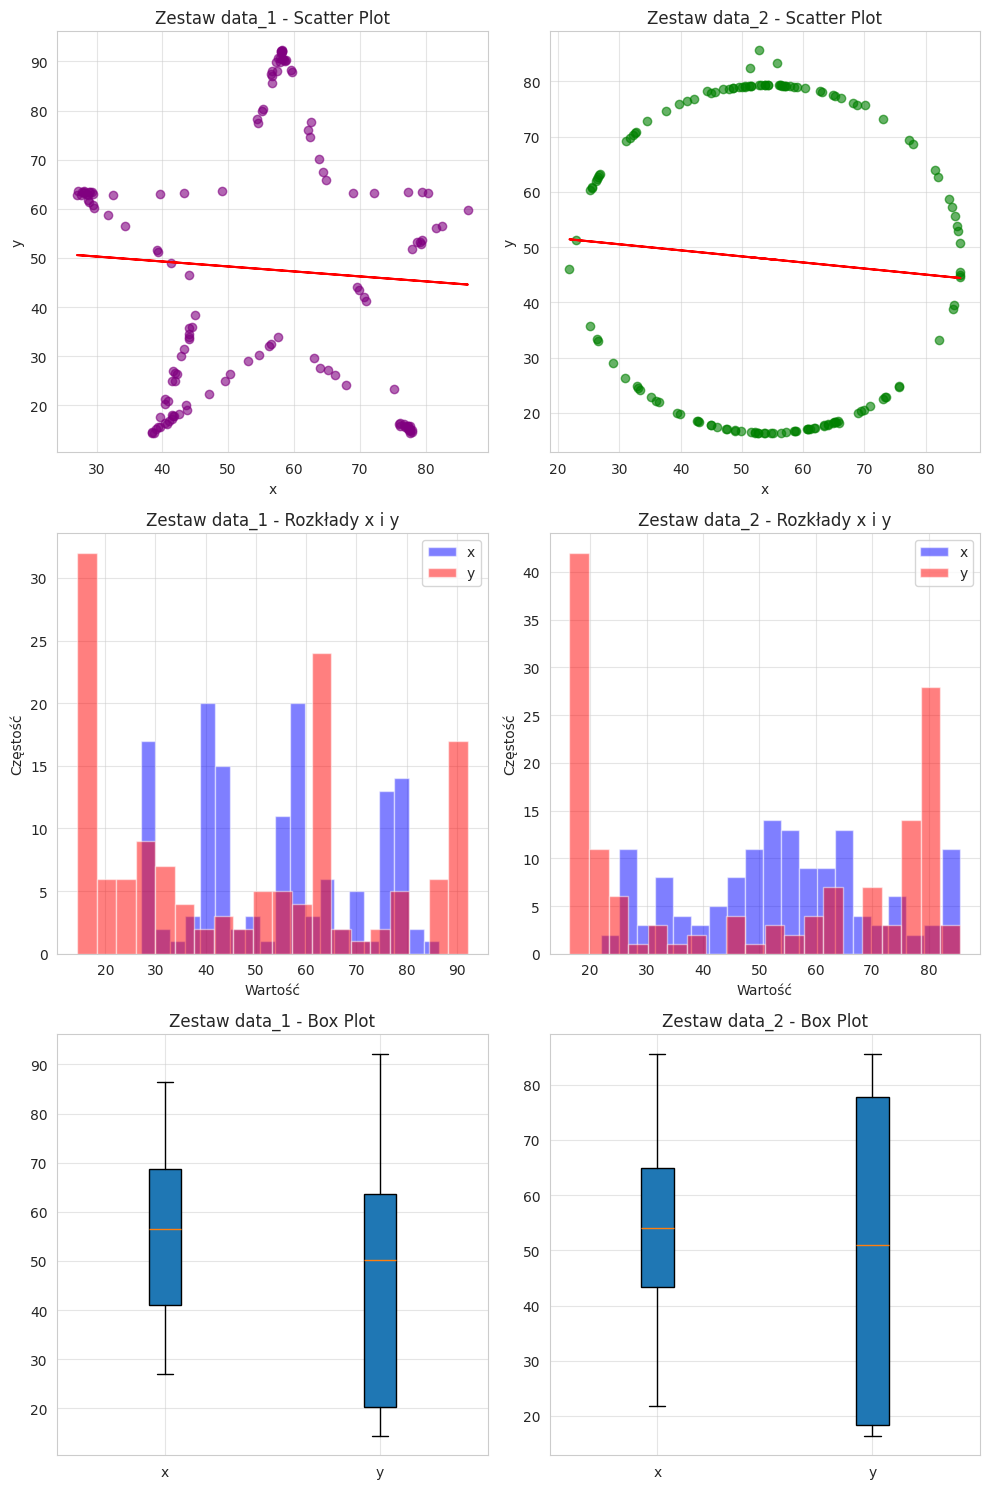

In [39]:
data_1 = datasaurus[datasaurus["dataset"] == "star"]
data_2 = datasaurus[datasaurus["dataset"] == "circle"]

a1, b1, r1, p1, std_err1 = stats.linregress(data_1["x"], data_1["y"])
a2, b2, r2, p2, std_err2 = stats.linregress(data_2["x"], data_2["y"])

show_stats(data_1, data_2)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten() # tablica 3x2 > 1x6

axes[0].scatter(data_1["x"], data_1["y"], alpha=0.6, color="purple")
axes[0].plot(data_1["x"], a1 * data_1["x"] + b1, color="red")
axes[0].set_title("Zestaw data_1 - Scatter Plot")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].grid(True, alpha=0.5)

axes[1].scatter(data_2["x"], data_2["y"], alpha=0.6, color="green")
axes[1].plot(data_2["x"], a2 * data_2["x"] + b2, color="red")
axes[1].set_title("Zestaw data_2 - Scatter Plot")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].grid(True, alpha=0.5)

axes[2].hist(data_1["x"], alpha=0.5, label="x", bins=20, color="blue")
axes[2].hist(data_1["y"], alpha=0.5, label="y", bins=20, color="red")
axes[2].set_title("Zestaw data_1 - Rozkłady x i y")
axes[2].set_xlabel("Wartość")
axes[2].set_ylabel("Częstość")
axes[2].grid(True, alpha=0.5)
axes[2].legend()

axes[3].hist(data_2["x"], alpha=0.5, label="x", bins=20, color="blue")
axes[3].hist(data_2["y"], alpha=0.5, label="y", bins=20, color="red")
axes[3].set_title("Zestaw data_2 - Rozkłady x i y")
axes[3].set_xlabel("Wartość")
axes[3].set_ylabel("Częstość")
axes[3].grid(True, alpha=0.5)
axes[3].legend()

axes[4].boxplot([data_1["x"], data_1["y"]], tick_labels=["x", "y"], patch_artist=True)
axes[4].set_title("Zestaw data_1 - Box Plot")
axes[4].grid(True, alpha=0.5)

axes[5].boxplot([data_2["x"], data_2["y"]], tick_labels=["x", "y"], patch_artist=True)
axes[5].set_title("Zestaw data_2 - Box Plot")
axes[5].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

## OPIS

Analiza statystyczna i wizualna zestawów danych z kolekcji Datasaurus Dozen dostarcza doskonałego przykładu, dlaczego poleganie wyłącznie na statystykach opisowych może być mylące. Pomimo identycznych lub bardzo zbliżonych statystyk opisowych, ich struktura danych jest diametralnie różna, co pokazują dopiero wizualizacje. Statystyki liniowe, takie jak średnia, odchylenie standardowe, korelacja oraz ich linie regresji, nie są w stanie uchwycić tych nieliniowych i strukturalnych różnic w danych.

**ZADANIE 2: Stwórz własny przykład (dla ambitnych)**
-------------------------------------------
Spróbuj stworzyć dwa zestawy danych, które mają:
- Podobną średnią
- Podobne odchylenie standardowe
- Ale różne kształty na wykresie

Statystyki dla obu zestawów:
                  data_1  data_2
Liczba punktów    4.0000  4.0000
Suma x            2.0000  2.0000
Suma y            2.0000  2.0000
Średnia x         0.5000  0.5000
Średnia y         0.5000  0.5000
Mediana x         0.5000  0.5000
Mediana y         0.5000  0.5000
Moda x            0.0000  0.5000
Moda y            0.0000  0.5000
Min x             0.0000 -0.2071
Min y             0.0000 -0.2071
Max x             1.0000  1.2071
Max y             1.0000  1.2071
Zakres x          1.0000  1.4142
Zakres y          1.0000  1.4142
Kwantyl 0.05 x    0.0000 -0.1010
Kwantyl 0.05 y    0.0000 -0.1010
Kwantyl 0.95 x    1.0000  1.1010
Kwantyl 0.95 y    1.0000  1.1010
Q1 x              0.0000  0.3232
Q1 y              0.0000  0.3232
Q2 x              0.5000  0.5000
Q2 y              0.5000  0.5000
Q3 x              1.0000  0.6768
Q3 y              1.0000  0.6768
IQR x             1.0000  0.3536
IQR y             1.0000  0.3536
Q1 - 1.5 * IQR x -1.5000 -0.2071
Q1 - 1.5 * IQR

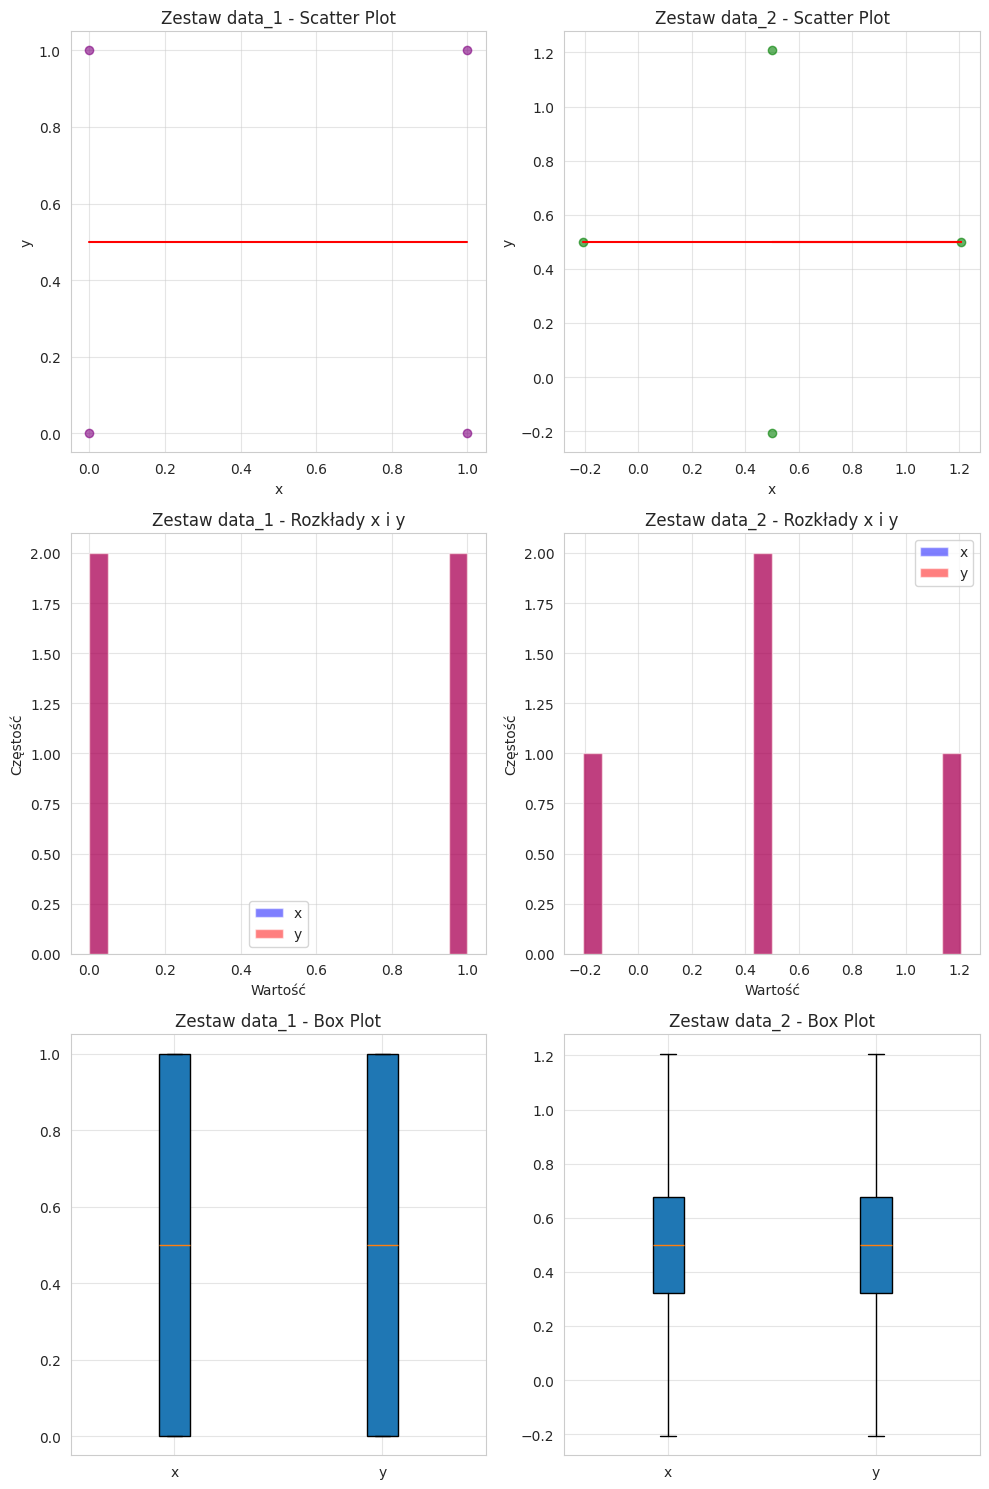

In [40]:
data_1 = pd.DataFrame({
    "x": [0, 0, 1, 1],
    "y": [0, 1, 1, 0]
})

data_2 = pd.DataFrame({
    "x": [0.5 - 0.7071, 0.5, 0.5 + 0.7071, 0.5],
    "y": [0.5, 0.5 + 0.7071, 0.5, 0.5 - 0.7071]
})

a1, b1, r1, p1, std_err1 = stats.linregress(data_1["x"], data_1["y"])
a2, b2, r2, p2, std_err2 = stats.linregress(data_2["x"], data_2["y"])

show_stats(data_1, data_2)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten() # tablica 3x2 > 1x6

axes[0].scatter(data_1["x"], data_1["y"], alpha=0.6, color="purple")
axes[0].plot(data_1["x"], a1 * data_1["x"] + b1, color="red")
axes[0].set_title("Zestaw data_1 - Scatter Plot")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].grid(True, alpha=0.5)

axes[1].scatter(data_2["x"], data_2["y"], alpha=0.6, color="green")
axes[1].plot(data_2["x"], a2 * data_2["x"] + b2, color="red")
axes[1].set_title("Zestaw data_2 - Scatter Plot")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].grid(True, alpha=0.5)

axes[2].hist(data_1["x"], alpha=0.5, label="x", bins=20, color="blue")
axes[2].hist(data_1["y"], alpha=0.5, label="y", bins=20, color="red")
axes[2].set_title("Zestaw data_1 - Rozkłady x i y")
axes[2].set_xlabel("Wartość")
axes[2].set_ylabel("Częstość")
axes[2].grid(True, alpha=0.5)
axes[2].legend()

axes[3].hist(data_2["x"], alpha=0.5, label="x", bins=20, color="blue")
axes[3].hist(data_2["y"], alpha=0.5, label="y", bins=20, color="red")
axes[3].set_title("Zestaw data_2 - Rozkłady x i y")
axes[3].set_xlabel("Wartość")
axes[3].set_ylabel("Częstość")
axes[3].grid(True, alpha=0.5)
axes[3].legend()

axes[4].boxplot([data_1["x"], data_1["y"]], tick_labels=["x", "y"], patch_artist=True)
axes[4].set_title("Zestaw data_1 - Box Plot")
axes[4].grid(True, alpha=0.5)

axes[5].boxplot([data_2["x"], data_2["y"]], tick_labels=["x", "y"], patch_artist=True)
axes[5].set_title("Zestaw data_2 - Box Plot")
axes[5].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

## OPIS

Było ciężko ale wyszło. Nie wiem jak zrobić bardziej zaawansowane obrazki. Pewnie jakimś algorytmem genetycznym by dało radę.